Exploratory Data Analysis

In [61]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
# import data
df = pd.read_csv('Cleaned_Zillow_Housing_data.csv')

# Drop unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [69]:
# display all rows 
pd.set_option('display.max.rows', 180)

In [70]:
df.head()

,SalesPrice,Unit Type,Sqft,Bedrooms,Bathrooms,Brokerage,Broker ID,Address,City,Postal Code
0,3950000,House,2872,4,2,MACDONALD REALTY BROKERAGE,R2866920,23215 141st Ave,Maple Ridge,V4R 2R4
1,3099000,House,3144,4,5,ROYAL LEPAGE SUSSEX BROKERAGE,R2866827,4735 Rutland Rd,Vancouver,V7W 1G6
2,2880000,House,4370,4,4,MACDONALD REALTY WESTMAR BROKERAGE,R2866875,7371 Sunnymede Cres,Richmond,V6Y 1H3
3,1160000,House,2736,5,4,2 PERCENT REALTY WEST COAST BROKERAGE,R2866879,22702 Kendrick Pl,Maple Ridge,V2X 9R1
4,2375000,House,2863,3,3,RE/MAX MASTERS REALTY BROKERAGE,R2866381,225 Mountain Dr,Lions Bay,V0N 2E0


In [71]:
# Correlation to price
df.corr()

/var/folders/73/nk6f3c_d6ql6pty_p3ylj0w40000gn/T/ipykernel_7987/4082782962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SalesPrice,Sqft,Bedrooms,Bathrooms
SalesPrice,1.000000,0.744909,0.324305,0.555878
Sqft,0.744909,1.000000,0.714440,0.869051
Bedrooms,0.324305,0.714440,1.000000,0.813893
Bathrooms,0.555878,0.869051,0.813893,1.000000


In [72]:
df.corr()['SalesPrice'].sort_values()

/var/folders/73/nk6f3c_d6ql6pty_p3ylj0w40000gn/T/ipykernel_7987/3429979656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalesPrice'].sort_values()


Bedrooms      0.324305
Bathrooms     0.555878
Sqft          0.744909
SalesPrice    1.000000
Name: SalesPrice, dtype: float64

In [73]:
# setup grid for sns plots
sns.set(style="darkgrid")
        

Inputs such as Sqft has a strong correlation in determining sales price of a housing unit sold. 
This is what we would expect.

[Text(0.5, 1.0, 'SalesPrice Distribution'),
 Text(0.5, 0, 'Salesprice in Cad'),
 (0.0, 40000000.0)]

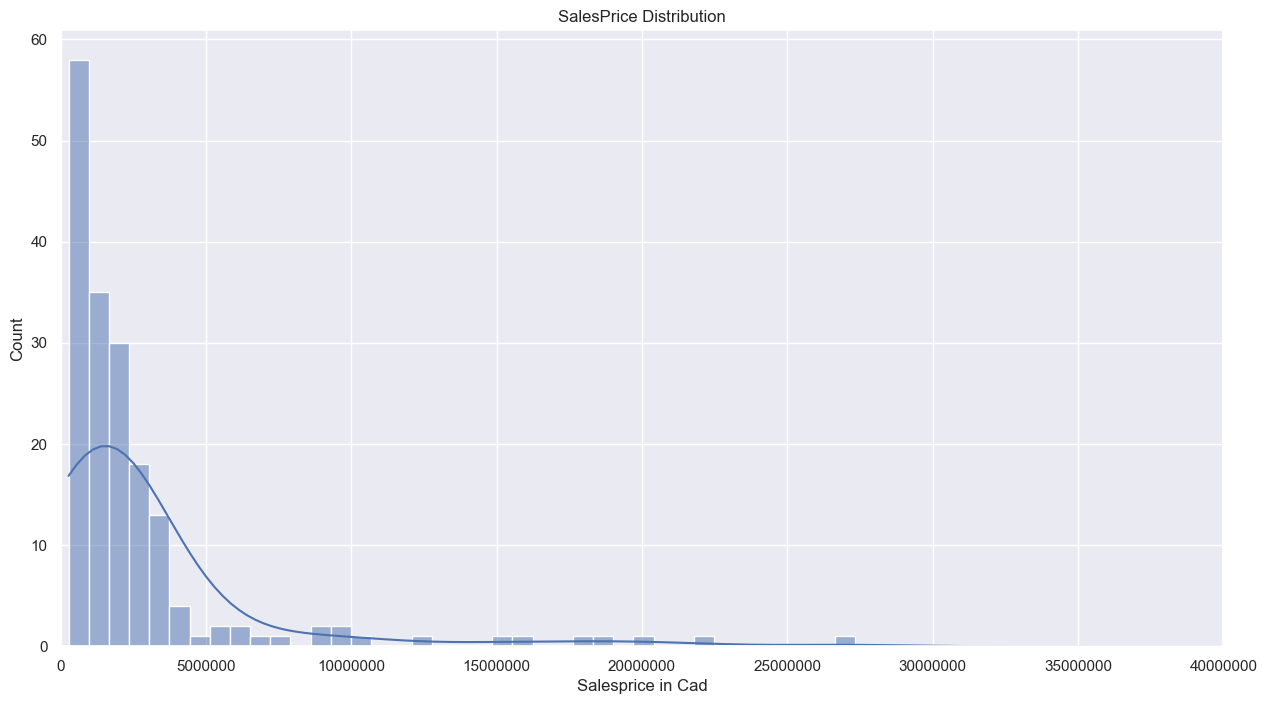

In [74]:
plt.figure(figsize=(15,8)) # to expand the graph
plt.ticklabel_format(style='plain', axis='x') # to get numbers for x-axis
graph1 = sns.histplot(df['SalesPrice'],kde=True)
graph1.set(title = 'SalesPrice Distribution',xlabel = 'Salesprice in Cad',xlim = (0,40000000))


From the histogram the sales price is rightskewed demonstrating that major portion of the houses in the greater vancouver are between 0 to 5000000 cad

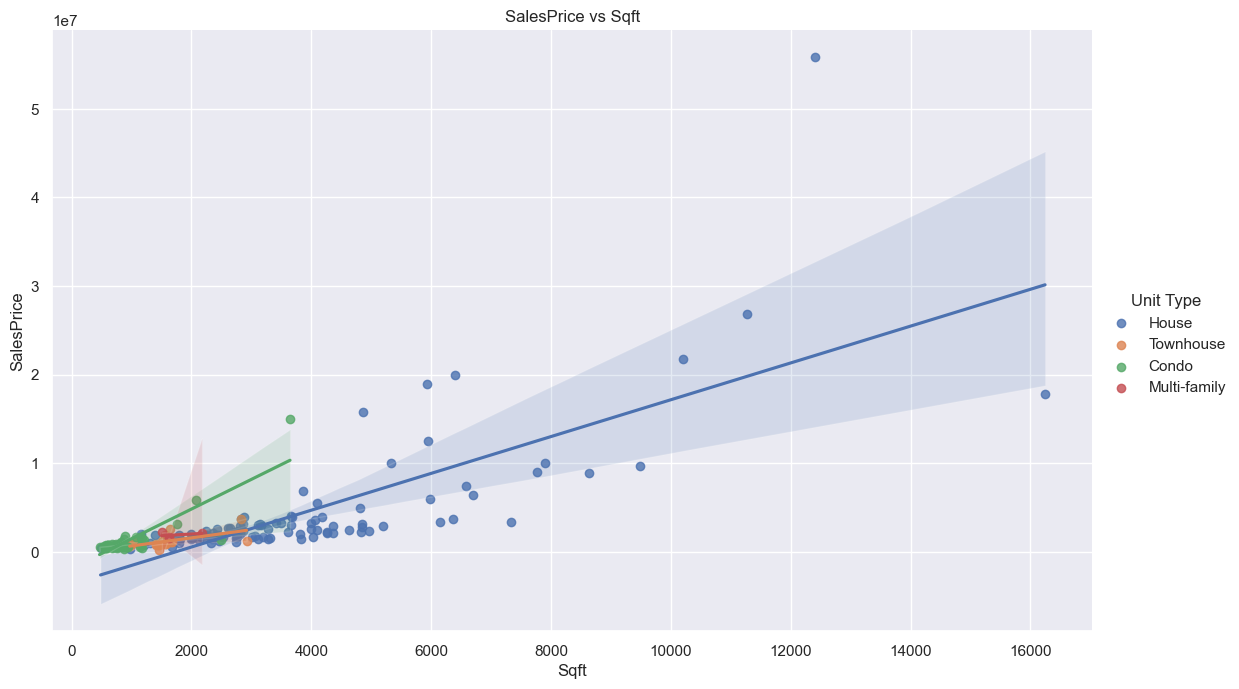

In [79]:
# for lmplot we need to configure size with height and aspect
graph2 = sns.lmplot(data = df ,x='Sqft',y='SalesPrice',height=7, aspect=1.6,hue='Unit Type')
graph2.set(title = 'SalesPrice vs Sqft')

In [77]:
# notice home in the unit category
df[df['Unit Type'] == 'Home']
df['Unit Type'].replace('Home', 'House', inplace=True)

In [1]:
# for Boxplot we need to configure size with height and aspect
fig, axes = plt.subplots(1,2,figsize = (11,5))
graph3 = sns.boxplot(data = df ,x='Bedroom',y='SalesPrice',ax = axes[0]) #hue='Unit Type'
graph3.set(title = 'SalesPrice vs Bedrooms')
graph4 = sns.boxplot(data = df ,x='Bathrooms',y='SalesPrice',ax = axes[1]) #hue='Unit Type'
graph4.set(title = 'SalesPrice vs Bathroom')

NameError: name 'plt' is not defined

The boxplots indicate a gradual increase in price as number of bedrooms and bathrooms increase. This aligns with the correlation above.

Check howmany homes are for sale for each city. Along with the relative prices.

[Text(0.5, 1.0, 'Number of Homes for Sal per City')]

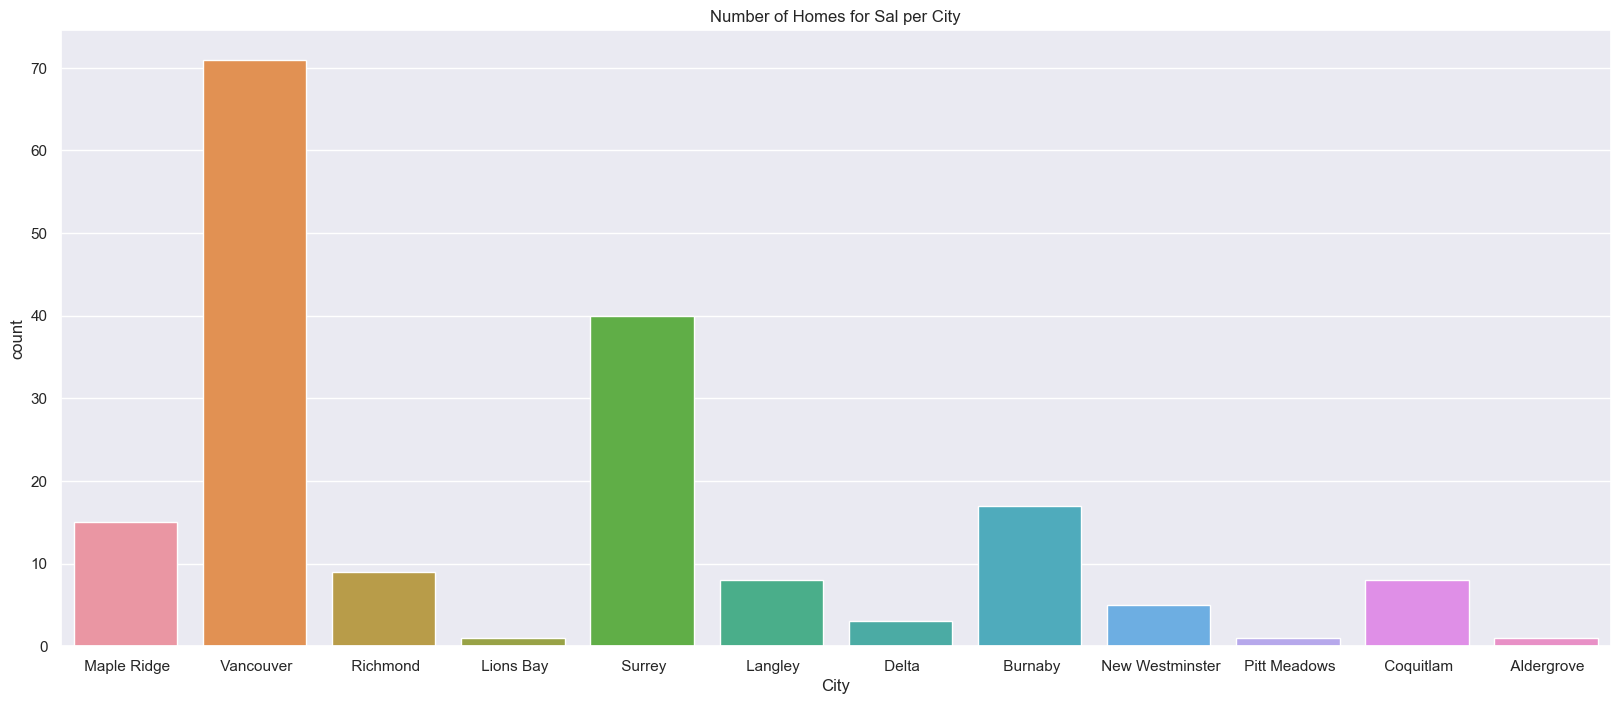

In [104]:
plt.figure(figsize=(20,8)) # to expand the graph
graph5 = sns.countplot(data = df , x = 'City')
graph5.set(title='Number of Homes for Sal per City')

[Text(0.5, 1.0, 'Number of Homes for Sale per City and Unit Type')]

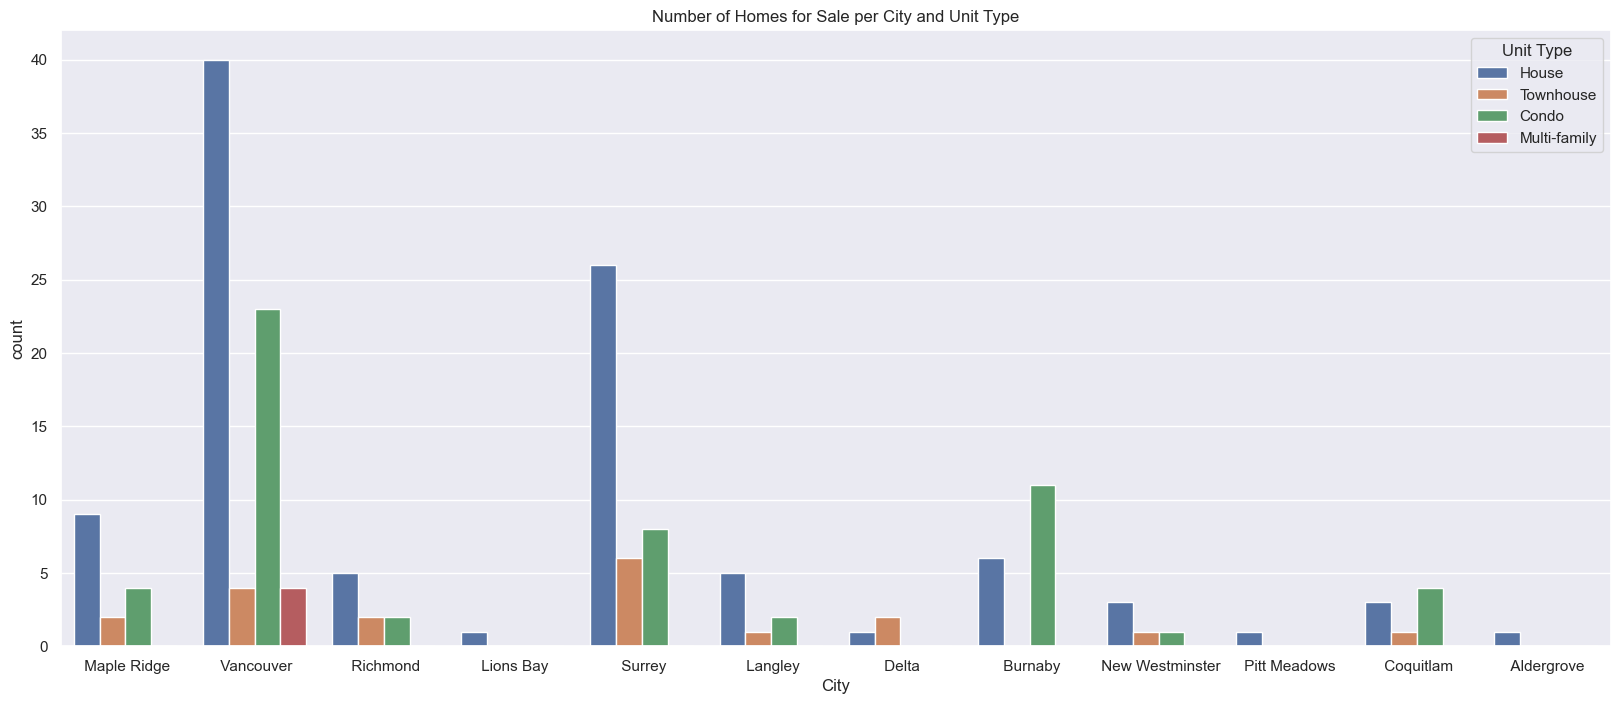

In [102]:
plt.figure(figsize=(20,8)) 
graph5 = sns.countplot(data = df , x = 'City',hue='Unit Type')
graph5.set(title='Number of Homes for Sale per City and Unit Type')

All municipaties indicate that the majority of the market have houses for sales while majority of Coquitlams is condos. Additionally, the only city that has muilti-family homes for sale are in Vancouver.

In [103]:
# export data to excel
df.to_excel('Zillow_Cleaned.xlsx') # create report in tableau

In [105]:
df

,SalesPrice,Unit Type,Sqft,Bedrooms,Bathrooms,Brokerage,Broker ID,Address,City,Postal Code
0,3950000,House,2872,4,2,MACDONALD REALTY BROKERAGE,R2866920,23215 141st Ave,Maple Ridge,V4R 2R4
1,3099000,House,3144,4,5,ROYAL LEPAGE SUSSEX BROKERAGE,R2866827,4735 Rutland Rd,Vancouver,V7W 1G6
2,2880000,House,4370,4,4,MACDONALD REALTY WESTMAR BROKERAGE,R2866875,7371 Sunnymede Cres,Richmond,V6Y 1H3
3,1160000,House,2736,5,4,2 PERCENT REALTY WEST COAST BROKERAGE,R2866879,22702 Kendrick Pl,Maple Ridge,V2X 9R1
4,2375000,House,2863,3,3,RE/MAX MASTERS REALTY BROKERAGE,R2866381,225 Mountain Dr,Lions Bay,V0N 2E0
5,1950000,House,2249,3,3,MACDONALD REALTY (SURREY/152) BROKERAGE,R2866951,1510 134a St,Surrey,V4A 5P2
6,3000000,House,3658,7,3,MACDONALD REALTY (LANGLEY) BROKERAGE,R2866330,23064 50th Ave,Langley,V2Z 2R7
7,6398000,House,6707,5,9,THE PARTNERS REAL ESTATE BROKERAGE,R2866653,888 Farmleigh Rd,Vancouver,V7S 1Z9
8,1649900,House,3003,5,3,ROYAL LEPAGE - WOLSTENCROFT BROKERAGE,R2864357,9280 204th St,Langley,V1M 1B7
9,2399000,House,4958,6,6,ROYAL LEPAGE - BROOKSIDE REALTY BROKERAGE,R2866438,11345 241a St,Maple Ridge,V2W 0A3
